# Assignment HW0 - Ravi Teja Srikakulapu (999903544)

## Markdown Task

### Sub Heading

This is the practice notebook, for practicing the Markdown with different fonts like **bold** and *italic*

And also experience the unordered list in markdown
- step 1
    1. And also giving the substep under the list
    2. substeps
- step 2
    - sub step 2
    
To give a link the word with a website like [Facebook](https://www.facebook.com/)

#### Importing the libraries

In [1]:
import requests
import json
import os
import pandas as pd

#### Obtaining the required data by calling API

In [1]:

if not os.path.exists('data'):
    os.makedirs('data')

endpoint = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data"
api_key = "zFyaObaYrVTdYZJVEjRDNknQQnRclQDu"


def get_noaa_data(year):
    url = f"{endpoint}?datasetid=GHCND&locationid=ZIP:80249&units=standard&startdate={year}-12-15&enddate={year+1}-01-21&limit=1000"
    headers = {'token': api_key}
    response = requests.get(url, headers=headers)
    data = response.json()
    with open(f"data/winter_{year}-{year+1}.json", "w") as outfile:
        json.dump(data, outfile)


for year in range(2008, 2022):
    get_noaa_data(year)


In [2]:
os.getcwd()
os.chdir(r'C:\Users\DELL\Data Mining\Home Work\hw0')

In [3]:
# Creating a column as file, to store year ranges from json file

dfs = []
for year in range(2008, 2022):
    with open(f"data/winter_{year}-{year+1}.json", "r") as infile:
        data = json.load(infile)
        file = str(year)+"-"+str(year+1)
        comb = pd.DataFrame(data['results'])
        comb['file'] = file             
        dfs.append(comb)
temp = pd.concat(dfs, ignore_index = True) 
temp.head()

,date,datatype,station,attributes,value,file
0,2008-12-15T00:00:00,ADPT,GHCND:USW00003017,",,W,",-244.0,2008-2009
1,2008-12-15T00:00:00,ASLP,GHCND:USW00003017,",,W,",10298.0,2008-2009
2,2008-12-15T00:00:00,ASTP,GHCND:USW00003017,",,W,",8324.0,2008-2009
3,2008-12-15T00:00:00,AWBT,GHCND:USW00003017,",,W,",-222.0,2008-2009
4,2008-12-15T00:00:00,AWND,GHCND:USW00003017,",,W,",4.7,2008-2009


In [4]:
# Getting only required columns
df = temp[['date','datatype','value','file']]
df.head()

,date,datatype,value,file
0,2008-12-15T00:00:00,ADPT,-244.0,2008-2009
1,2008-12-15T00:00:00,ASLP,10298.0,2008-2009
2,2008-12-15T00:00:00,ASTP,8324.0,2008-2009
3,2008-12-15T00:00:00,AWBT,-222.0,2008-2009
4,2008-12-15T00:00:00,AWND,4.7,2008-2009


In [5]:
df = df.query('datatype in ["TMAX", "TMIN"]')
df.head()

,date,datatype,value,file
14,2008-12-15T00:00:00,TMAX,2.0,2008-2009
15,2008-12-15T00:00:00,TMIN,-19.0,2008-2009
37,2008-12-16T00:00:00,TMAX,34.0,2008-2009
38,2008-12-16T00:00:00,TMIN,-8.0,2008-2009
59,2008-12-17T00:00:00,TMAX,37.0,2008-2009


In [6]:
range = df.groupby('datatype').get_group("TMAX")[["date","file"]].set_index('date')
TMAX = df.groupby('datatype').get_group("TMAX")[["date","value"]].set_index('date')
TMIN = df.groupby('datatype').get_group("TMIN")[["date","value"]].set_index('date')

In [7]:
df_combine = pd.concat([TMAX, TMIN], axis=1)

def tavg(dt):
    return (dt.iloc[0]+dt.iloc[1])/2
    
TAVG = pd.DataFrame(df_combine.apply(tavg, axis = 1))
df_final = pd.concat([TMAX, TMIN, TAVG,range], axis=1)
df_final.head()

,value,value,0,file
date,,,,
2008-12-15T00:00:00,2.0,-19.0,-8.5,2008-2009
2008-12-16T00:00:00,34.0,-8.0,13.0,2008-2009
2008-12-17T00:00:00,37.0,14.0,25.5,2008-2009
2008-12-18T00:00:00,28.0,5.0,16.5,2008-2009
2008-12-19T00:00:00,44.0,14.0,29.0,2008-2009


In [8]:
df_final.columns = ['TMAX','TMIN', 'TAVG', 'Range']
df_required = df_final[['TMAX','TMIN', 'TAVG']]
df_final.to_csv("data/all_data_max_min_avg.csv", index=True) # saving the dataframe to csv with date,Tmax, Tmin, Tavg columns
df_final.to_csv("data/all_data.csv", index=True)

In [14]:
df1 = pd.read_csv("data/all_data.csv")
df1.head()

,date,TMAX,TMIN,TAVG,Range
0,2008-12-15T00:00:00,2.0,-19.0,-8.5,2008-2009
1,2008-12-16T00:00:00,34.0,-8.0,13.0,2008-2009
2,2008-12-17T00:00:00,37.0,14.0,25.5,2008-2009
3,2008-12-18T00:00:00,28.0,5.0,16.5,2008-2009
4,2008-12-19T00:00:00,44.0,14.0,29.0,2008-2009


In [15]:
df1['date'] = pd.to_datetime(df1['date'])
df1['year'] = df1['date'].dt.year  
df1['date'] = pd.to_datetime(df1['date']).dt.strftime('%m-%d')
df1.head()

,date,TMAX,TMIN,TAVG,Range,year
0,12-15,2.0,-19.0,-8.5,2008-2009,2008
1,12-16,34.0,-8.0,13.0,2008-2009,2008
2,12-17,37.0,14.0,25.5,2008-2009,2008
3,12-18,28.0,5.0,16.5,2008-2009,2008
4,12-19,44.0,14.0,29.0,2008-2009,2008


In [16]:
def yearrange(y):
    return str(y)+" - "+str(y+1)

df1['year_range'] = df1['year'].apply(yearrange)

In [17]:
df1.to_csv("data/all.csv", index=False)

In [33]:
df_pivot = df1.pivot_table(index = ['date'],columns = ['Range'], values = ['TAVG'])
df_pivot.sort_index(ascending = False, axis = 0)

TAVG                                                              \
Range 2008-2009 2009-2010 2010-2011 2011-2012 2012-2013 2013-2014 2014-2015   
date                                                                          
12-31      35.5      22.0       4.5      37.0      16.5      44.0       8.5   
12-30      39.5      21.0      20.0      44.0      25.0       NaN      -9.0   
12-29      43.5      24.0      40.5      45.0      18.0       NaN      11.0   
12-28      41.5      17.5      36.0      38.5      20.5       NaN      23.0   
12-27      22.5      15.0      31.5      30.5      16.5       NaN      15.5   
12-26      30.0      25.0      34.5      30.5       9.5       NaN      14.0   
12-25      30.0      11.5      34.5      27.0       8.0       NaN      32.5   
12-24      27.0      12.0      31.5      24.0      25.0       NaN      34.0   
12-23      19.0      20.0      34.0      21.5      40.0       NaN      26.5   
12-22      15.0      36.0      27.5      15.0      40.0       NaN      31.0   
12-21       9.5      45.5      27.5      30.0      38.5       NaN      39.0   
12-20      15.5      38.0      36.5      29.5      28.0       NaN      35.0   
12-19      29.0      32.5      38.0      29.5      15.5       NaN      34.0   
12-18      16.5      30.0      25.5      41.5      33.5       NaN      33.0   
12-17      25.5      38.5      24.5      29.0      36.5       NaN      29.5   
12-16      13.0      42.5      26.0      27.0      32.0       NaN      23.0   
12-15      -8.5      37.5      38.5      30.0      36.0       NaN      30.0   
01-21      56.0      31.5      34.5      48.0      36.5      44.0      23.0   
01-20      48.5      29.0      22.5      43.0      30.5      34.5      34.5   
01-19      48.5      34.5      26.5      46.5      41.0      50.0      44.5   
01-18      46.5      40.5      39.0      30.0      44.0      40.5      50.0   
01-17      40.5      41.5      47.5      15.5      34.5      37.5      44.5   
01-16      46.0      42.0      38.0      28.0      35.5      34.0      45.0   
01-15      35.0      34.5      38.0      45.5      13.5      37.0      39.0   
01-14      35.0      34.0      39.0      39.0       2.0      28.0      30.0   
01-13      31.5      43.0      37.0      33.0       0.5      36.0      27.0   
01-12      26.0      38.0      13.5      17.5      -1.0      35.0      25.0   
01-11      32.5      34.0       5.0      19.5      21.5      38.0      33.5   
01-10      32.0      32.0       4.5      45.5      35.5      31.5      39.0   
01-09      31.5      25.0      24.5      37.0      41.0      32.0      22.0   
01-08      46.5      11.0      35.0      27.0      39.5      28.0      34.0   
01-07      41.0      -1.5      32.5      30.5      37.5      32.0      26.5   
01-06      33.0      18.0      39.0      36.0      30.0      13.0      34.5   
01-05      27.0      33.0      31.5      52.5      26.5       1.0      25.5   
01-04      17.0      23.5      22.5      41.5      31.0      22.0      13.0   
01-03      30.5      26.0      18.0      41.5      23.0      43.5      15.0   
01-02      47.5      28.0      25.0      36.0      23.0      26.5      23.0   
01-01      45.0      26.0      10.5      27.0      16.0      27.0      15.5   

                                                                             
Range 2015-2016 2016-2017 2017-2018 2018-2019 2019-2020 2020-2021 2021-2022  
date                                                                         
12-31      14.0      27.0      14.5      16.0      31.0      31.0      24.0  
12-30      14.0      50.0      23.5      40.0      17.0      25.5      32.0  
12-29      12.5      32.0      36.5      22.0      16.5      24.0      22.0  
12-28      13.0      33.0      35.5      15.5      24.5      27.5      24.0  
12-27      14.5      33.0      25.0      21.5      27.5      36.0      29.0  
12-26      11.0      30.0       7.0      28.0      28.0      45.0      36.0  
12-25      20.5      33.0      10.5      33.5      38.5      45.5    

The year range 2013 -2014 has missing information

In [34]:
df_pivot = (df_pivot.droplevel(0,axis = 1).rename_axis(None, axis = 1).reset_index())
df_pivot.to_csv("data/all_data_avg.csv",index = False)

§ Task: Write functions to compute temperature averages.

write three functions:

- one called average() which takes a DataFrame as a parameter and returns the average the DataFrame
- one called average_high() which takes a DataFrame as a parameter and returns the average of the maximum 'TMAX' of the DataFrame
- one called average_low() which takes a DataFrame as a parameter and returns the average of the minimum 'TMIN' of the DataFrame

In [20]:
df2 = df1[df1['Range']!='2013-2014'] #Excluding the missing information year

In [21]:
df3 = df2[['TMAX', 'TMIN', 'TAVG']]
def average(dt):
    return dt.mean()
   
print("The average temperature of the DataFrame is \n{}".format(average(df3)))


The average temperature of the DataFrame is 
TMAX    43.740891
TMIN    17.404858
TAVG    30.572874
dtype: float64


In [22]:
def average_high(dt):
    for i in dt.columns:
        if i == 'TMAX':
            return dt[i].mean()
   
print("the average of the maximum 'TMAX' of the DataFrame is {}".format(average_high(df2)))


the average of the maximum 'TMAX' of the DataFrame is 43.74089068825911


In [23]:
def average_low(dt):
    for i in dt.columns:
        if i == 'TMIN':
            return dt[i].mean()
   
print("the average of the minimum 'TMIN' of the DataFrame is {}".format(average_low(df2)))


the average of the minimum 'TMIN' of the DataFrame is 17.40485829959514


In [28]:
def maximum_df(dt):
    return dt.max()
   
print("The Maximum temperature of the DataFrame is \n{}".format(maximum_df(df3)))


The Maximum temperature of the DataFrame is 
TMAX    71.0
TMIN    41.0
TAVG    56.0
dtype: float64


In [31]:
def mini_df(dt):
    return dt.min()
   
print("The Minimum temperature of the DataFrame is \n{}".format(mini_df(df3)))


The Minimum temperature of the DataFrame is 
TMAX     1.0
TMIN   -19.0
TAVG    -9.0
dtype: float64


Use the Seaborn library to create a heatmap of the TAVG for 2008-2022.
- the 𝑦-axis should be the year (e.g. 2008-2009, 2010-2011, etc) and 𝑥-axis the day (e.g. 12-15, 12-16, etc)

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
df2.head()

,date,TMAX,TMIN,TAVG,Range,year,year_range
0,12-15,2.0,-19.0,-8.5,2008-2009,2008,2008 - 2009
1,12-16,34.0,-8.0,13.0,2008-2009,2008,2008 - 2009
2,12-17,37.0,14.0,25.5,2008-2009,2008,2008 - 2009
3,12-18,28.0,5.0,16.5,2008-2009,2008,2008 - 2009
4,12-19,44.0,14.0,29.0,2008-2009,2008,2008 - 2009


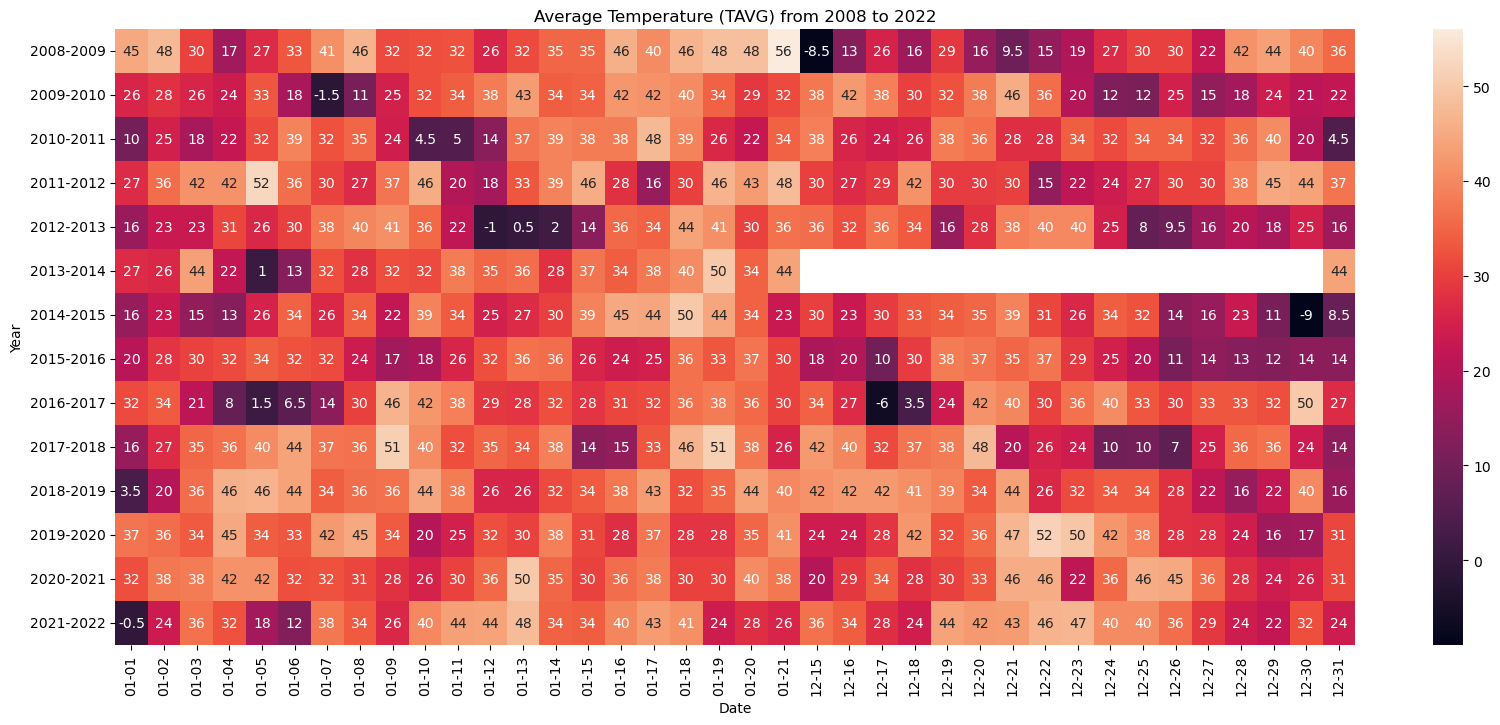

In [26]:
plt.figure(figsize=(20, 8))
data= pd.pivot_table(df1, values='TAVG', index='Range', columns='date')
sns.heatmap(data, annot=True)
plt.title('Average Temperature (TAVG) from 2008 to 2022')
plt.xlabel('Date')
plt.ylabel('Year')
plt.show()

Above heatmap clearly show the missing information for the year 2013 - 2014 between date ranges 12-15 to 12 - 30